# Sesión 09: Análisis de regresión: variables dicotómicas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 9.1. Variables dicotómicas

El archivo *b08_ubermty* contiene información de viajes en taxi o uber en la ciudad de Monterrey de junio de 2016 a agosto de 2017. Crearemos un modelo para estimar la duración de cada viaje en función de la distancia y el día de la semana.

In [2]:
# Cargar los datos
df = pd.read_excel('data/b08_ubermty.xlsx', usecols=['id', 'dropoff_longitude', 'dropoff_latitude', 
                                                     'Dia', 'DuracionMinutos', 'DistanciaKm'])

In [3]:
# Revisar las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9482 entries, 0 to 9481
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9482 non-null   int64  
 1   dropoff_longitude  9482 non-null   float64
 2   dropoff_latitude   9482 non-null   float64
 3   Dia                9482 non-null   int64  
 4   DuracionMinutos    9482 non-null   float64
 5   DistanciaKm        9482 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 444.6 KB


In [4]:
# Revisar las primeras filas
df.head()

,id,dropoff_longitude,dropoff_latitude,Dia,DuracionMinutos,DistanciaKm
0,54644,-100.314728,25.673226,6,111.483333,12.166
1,51418,-100.092651,25.646699,3,95.100000,10.045
2,74072,-100.334113,25.648527,6,158.116667,34.912
3,5856,-100.146905,25.760560,1,125.316667,23.693
4,64874,-100.178756,25.727530,6,85.366667,3.192


In [5]:
# Obtener la estadística descriptiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9482.0,43402.521198,25380.480870,3.000000,21634.250000,44131.000000,62190.500000,90275.000000
dropoff_longitude,9482.0,-100.302251,0.129046,-100.638818,-100.403559,-100.305847,-100.187182,-99.948161
dropoff_latitude,9482.0,25.700429,0.053719,25.462341,25.661272,25.686222,25.742285,25.984867
Dia,9482.0,4.126239,2.099465,1.000000,2.000000,4.000000,6.000000,7.000000
DuracionMinutos,9482.0,20.922733,24.412291,0.516667,8.316667,14.033333,23.912500,284.733333
DistanciaKm,9482.0,8.055608,7.181968,0.201000,3.264250,5.832500,10.315750,49.993000


In [6]:
# Filtrado de valores atípicos
Q1 = df['DuracionMinutos'].quantile(0.25)
Q3 = df['DuracionMinutos'].quantile(0.75)
IQR = Q3-Q1
lim_inf = Q1-1.5*IQR
lim_sup = Q3+1.5*IQR
df = df[(df['DuracionMinutos']>lim_inf)&(df['DuracionMinutos']<lim_sup)]

<Axes: xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

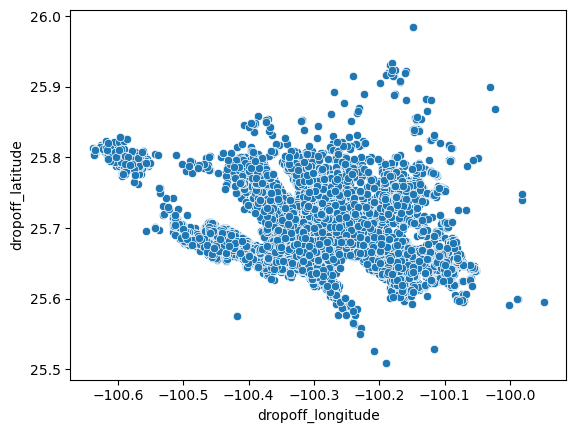

In [7]:
# Generar un gráfico
sns.scatterplot(x="dropoff_longitude",
                y="dropoff_latitude",
                data=df)

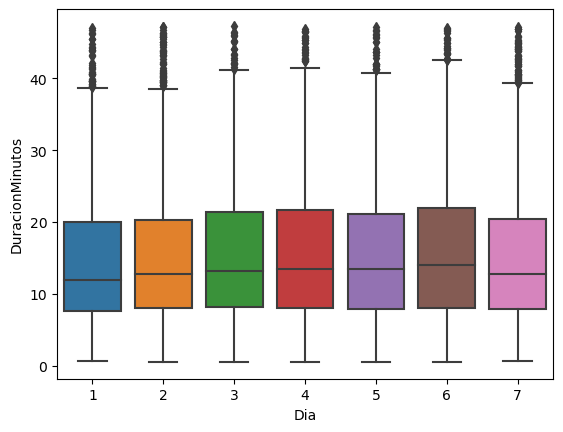

In [8]:
sns.boxplot(x='Dia', y='DuracionMinutos', data=df);

In [9]:
df.head()

,id,dropoff_longitude,dropoff_latitude,Dia,DuracionMinutos,DistanciaKm
104,48028,-100.363633,25.700368,6,43.533333,6.681
107,89523,-100.184078,25.778774,2,39.750000,3.033
111,44154,-100.296799,25.639075,2,41.400000,5.199
115,89531,-100.173469,25.796127,2,35.300000,1.442
118,72769,-100.272574,25.678928,3,38.750000,5.663


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8740.0,43466.666590,25443.452973,3.000000,21415.750000,44189.500000,62193.500000,90275.000000
dropoff_longitude,8740.0,-100.301141,0.129878,-100.638117,-100.403471,-100.304333,-100.186162,-99.948161
dropoff_latitude,8740.0,25.700220,0.053294,25.509155,25.661135,25.686231,25.742308,25.984867
Dia,8740.0,4.117277,2.106904,1.000000,2.000000,4.000000,6.000000,7.000000
DuracionMinutos,8740.0,15.513423,10.032536,0.516667,7.916667,12.916667,20.950000,47.300000
DistanciaKm,8740.0,7.125978,5.775913,0.201000,3.093000,5.493500,9.356750,48.485000


**Creación de variables dicotómicas**: La función `get_dummies` convierte una variable categórica (con k categorías) en k variables dicotómicas. Entre otros parámetros se puede establecer:
- prefix: agrega un prefijo a los nombres de las columnas.
- dtype: de manera predeterminada está en *booleano*, se puede cambiar a *int*
- drop_first: quita la columna con la primera categoría

In [11]:
# Crear variables dicotómicas
dummy_vars = pd.get_dummies(df['Dia'], prefix='Dia', dtype=int, drop_first=True)
dummy_vars.head(3)

,Dia_2,Dia_3,Dia_4,Dia_5,Dia_6,Dia_7
104,0,0,0,0,1,0
107,1,0,0,0,0,0
111,1,0,0,0,0,0


In [12]:
# Agregar las variables dummy al DataFrame original
df = pd.concat([df, dummy_vars], axis=1)
# Quitar variable categórica original
df = df.drop(columns=['Dia'])

In [13]:
df.columns

Index(['id', 'dropoff_longitude', 'dropoff_latitude', 'DuracionMinutos',
       'DistanciaKm', 'Dia_2', 'Dia_3', 'Dia_4', 'Dia_5', 'Dia_6', 'Dia_7'],
      dtype='object')

In [14]:
X = df[['DistanciaKm', 'Dia_2', 'Dia_3', 'Dia_4', 'Dia_5',
       'Dia_6', 'Dia_7']]  
# Añadir una columna de unos para el intercepto
X = sm.add_constant(X)
y = df['DuracionMinutos']

In [15]:
# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Imprimir los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        DuracionMinutos   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     1537.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:36:39   Log-Likelihood:                -29046.
No. Observations:                8740   AIC:                         5.811e+04
Df Residuals:                    8732   BIC:                         5.816e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.2070      0.205     25.385      

los resultados del modelo indican una R cuandrada de 0.552, es decir, que el modelo explica el 55.2% de la variacoin de la valraible dependiente. el modelo es significante es significativo (F=1537), p<0.01) Todas las variables en el modelo resultaron significativas (p>0.01).